## Autoencoder 

Autoencoders are neural networks that aim to reduce noise. 

The autoencoder are comprised of three components: An encoder, code layer (latent space, containing encoded data) and a decoder. The simplest form of an autoencder is a fullly-connected one, illustrated in figure below. [1]

<img src="./misc/fully_connected_autoencoder.png" alt="drawing" width="500" align="center"/>

The encoder compresses the input dataset into the encoded data, whereas the decoder decodes the codes into a denoised dataset. The performance of the autoencoder is often represented by the squared cell-wise difference between the input dataset and the denoised dataset. 

Autoencoders are commonly used in computer vision setting. The gif below illustrates denoising of a zero from the `mnist` dataset.

<img src="./misc/denoising_image.gif" width="400" align="center"/>

In comparison to e.g. PCA that is only able to learn linear representations of the data, autoencoders are able to learn non-linear relationships contained in the data.

One disadvantage of the technique is that it is not interpretable: We are unable to retain what features the network decides to keep in the coded sample. [More info here.](https://akajuvonen.github.io/2018/04/25/autoencoder.html)

In this notebook, we utilise a fully-connected, two-layered autocoder to denoise the dataset. The rationale for only using two layers is to ensure that the fitting of the autoencoder is relatively efficient.

On top of the encoded data, we apply a gradient boosting machine to classify the samples. In particular, we apply `lightgbm` as seen in the _09-Gradient-Boosting-Machines_ notebook.

## Comment on parameters

The parameters that can be tuned are those that can be tuned for regular articifical neural networks. That is
* The number of hidden layers and the number of nodes in each hidden layer. 
* The activation functions
* The learning rate

# Preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# internal
import utils.nicer_plots
from utils.import_data import importData
from utils.model_tester import ModelTester
from utils.autoencoder import AutoencoderLGBMClassifier
# external 
import torch.nn as nn
from utils.autoencoder import (
    AE, 
    AutoEncoder
)
# Notebook settings
%load_ext autoreload
%autoreload 2

In [7]:
file_data = "data2.feather"
file_labels = "labels2.csv"
n_features = -1
directory = "/data/"

data, labels = importData(file_data, file_labels, directory, n_features, iterations=False)

Number of samples:    102400
Number of features:   3851


## Defining the model

The autoencoder is defined in the helper file `autoencoder.py`. We solely instantiate the network here.

In [10]:
_, D = data.shape

In order to do hyperparameter tuning for both the gradient boosting machine and the autoencoder, we define a new, merged class: `AutoencoderLGBMClassifier`. Imported in the next cell.

Is essence we define new fit and predict methods in order to be able to test hyper-parameters for both the dimensionality reduction model and the classifier. The fit method is doing hyper parameter tuning before fitting of the classifier.

In [16]:
mt = ModelTester(
    data, 
    labels, 
    AutoencoderLGBMClassifier,
    plot_loss = True
)
obj = mt.model()

Lets do initial fitting to see what direction to tune the hyperparameters. 

The initial fitting also prints the training and validation loss (here defined as a proportion of the training set, not to be confused with the test set) from the from the first loop of the fitting procedure - that is, when the test set is the iteration directly after the training set. 

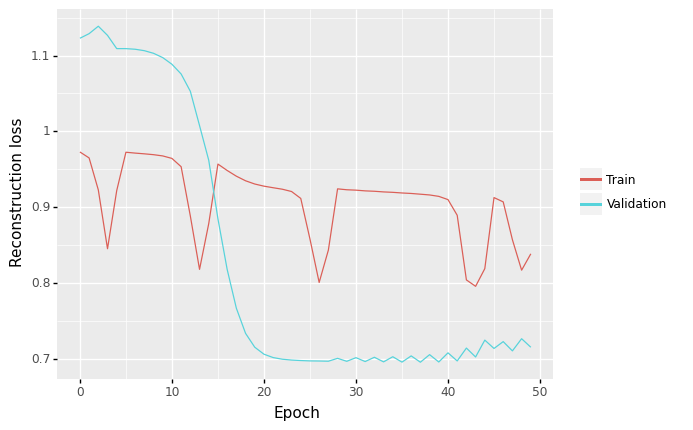

/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


In [17]:
mt.training_loop(n_train = 8, n_test = 2, starting_iters = [3])

We note that we could've run the algorithm for further epochs and still not overfitted to the data. However, for computational reasons we only run it for 50 epochs.

Now we run the training loop with multiple staring iters. We redefine the model to not plot the train val loss.
**Note**: The results from the training loop can be read from the models folder.

In [18]:
mt = ModelTester(
    data, 
    labels, 
    AutoencoderLGBMClassifier,
    plot_loss = False
)
obj = mt.model()

In [19]:
mt.training_loop(n_train = 8, n_test = 2)

/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


## Metrics on the Training Set 

In [21]:
mt.print_essentials(test = False, results_path = "../models/autoencoder/results")

Results: 

variable                             average    std  95.0% PI             min     max
---------------------------------  ---------  -----  ----------------  ------  ------
weighted accuracy [%]                 100      0     (100.0, 100.0)    100     100
duration [s]                          208.9    7.16  (203.78, 214.02)  198.9   221.73
infeasible_percentage [%]              84.63   3.12  (82.4, 86.87)      76.62   87.85
infeasible_guessed_percentage [%]      84.63   3.12  (82.4, 86.87)      76.62   87.85
feasible_recall [%]                   100      0     (100.0, 100.0)    100     100
feasible_precision [%]                100      0     (100.0, 100.0)    100     100
infeasible_recall [%]                 100      0     (100.0, 100.0)    100     100
infeasible_precision [%]              100      0     (100.0, 100.0)    100     100
auc of roc                              0      0     (0.0, 0.0)          0       0

Results saved to ../models/autoencoder/results/train


## Metrics on the Test Set

In [20]:
mt.print_essentials(results_path = "../models/autoencoder/results")

Results: 

variable                             average    std  95.0% PI             min     max
---------------------------------  ---------  -----  ----------------  ------  ------
weighted accuracy [%]                  49.93   0.3   (49.71, 50.14)     49.09   50.21
duration [s]                          207.55   7.11  (202.46, 212.64)  197.59  220.36
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)     77.25   85.45
infeasible_guessed_percentage [%]      99.04   2.18  (97.48, 100.59)    92.58  100
feasible_recall [%]                     0.85   1.77  (-0.41, 2.12)       0       6.01
feasible_precision [%]                 11.11  13.12  (1.73, 20.5)        0      40
infeasible_recall [%]                  99      2.3   (97.36, 100.65)    92.16  100
infeasible_precision [%]               82.53   2.48  (80.76, 84.31)     76.9    85.45
auc of roc                              0.5    0.02  (0.48, 0.52)        0.47    0.55

Results saved to ../models/autoencoder/results/test

## Hyperparameter tuning 

From the results, it seems that we want to reduce the overfitting to the dataset. We therefore adjust two of the hyperparameters to achieve this result: `max_depth` and `num_leaves`.

For the autoencoder we also test a lower number of nodes to reduce the complexity of the model. We do not add any extra layers since that would only increase the complexity of the model and thus increase overfitting .

The number of epochs for each combination of hyper-parameters is lowered from 10 to 3 in order to speed up the tuning duration.

In [22]:
# Model parameters
sampling = 'under'

# parameters that will be tested
parameters = {
    'max_depth': [-1, 50],
    'num_leaves': [20, 31],
    'layers': [[2056, 1024],[1024, 512]],
    'act_fn': [nn.LeakyReLU(), nn.ReLU()],
    'max_epochs': [50]
}

# Run the grid search
mt.hyperparameter_tuning(n_train = 8, n_test = 2, n_epochs = 3, sampling = sampling, **parameters)

  0%| | 0/16 [00:00<?, ?it/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


  6%| | 1/16 [09:45<2:26:1/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 12%|▏| 2/16 [19:08<2:13:3/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 19%|▏| 3/16 [24:05<1:36:4/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 25%|▎| 4/16 [29:32<1:19:5/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 31%|▎| 5/16 [40:25<1:29:5/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 38%|▍| 6/16 [51:40<1:32:1/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 44%|▍| 7/16 [56:55<1:11:2/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 50%|▌| 8/16 [1:02:24<57:1/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 56%|▌| 9/16 [1:12:47<57:0/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 62%|▋| 10/16 [1:23:45<54:/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 69%|▋| 11/16 [2:14:46<1:4/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 75%|▊| 12/16 [2:32:46<1:2/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 81%|▊| 13/16 [2:42:22<52:/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 88%|▉| 14/16 [3:20:12<47:/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


 94%|▉| 15/16 [3:30:29<19:/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


100%|█| 16/16 [3:35:34<00:


   Ranking    max_depth    num_leaves  layers        act_fn                            max_epochs    balanced_accuracy    Standard deviation
---------  -----------  ------------  ------------  ------------------------------  ------------  -------------------  --------------------
        1           50            20  [2056, 1024]  LeakyReLU(negative_slope=0.01)            50             0.502095           0.0018279
        2           50            20  [1024, 512]   ReLU()                                    50             0.501905           0.00310049
        3           50            31  [1024, 512]   ReLU()                                    50             0.500884           0.000906319
        4           -1            20  [1024, 512]   LeakyReLU(negative_slope=0.01)            50             0.500432           0.00150459
        5           -1            31  [1024, 512]   LeakyReLU(negative_slope=0.01)            50             0.500365           0.00168392
        6           -1 

{'max_depth': 50,
 'num_leaves': 20,
 'layers': [2056, 1024],
 'act_fn': LeakyReLU(negative_slope=0.01),
 'max_epochs': 50}

Retrain with the best parameters

In [25]:
mt.parameters = {
     'max_depth': 50,
     'num_leaves': 20,
     'layers': [2056, 1024],
     'act_fn': nn.LeakyReLU(negative_slope=0.01),
     'max_epochs': 50,
}
mt.training_loop(sampling = 'under')

/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


/Users/ludvigwarnberggerdin/miniforge3/envs/folder/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `max_iter` in params. Will use it instead of argument


[LightGBM] [Warning] num_iterations is set=500, max_iter=500 will be ignored. Current value: num_iterations=500


In [26]:
mt.print_essentials()

Results: 

variable                             average    std  95.0% PI            min     max
---------------------------------  ---------  -----  ---------------  ------  ------
weighted accuracy [%]                  50.08   0.36  (49.82, 50.33)    49.69   51.08
duration [s]                          198.17  20.73  (183.34, 213.0)  170.08  223.45
infeasible_percentage [%]              82.56   2.4   (80.85, 84.28)    77.25   85.45
infeasible_guessed_percentage [%]      92.64  20.25  (78.15, 107.12)   31.93  100
feasible_recall [%]                     7.48  20.77  (-7.39, 22.34)     0      69.74
feasible_precision [%]                 12.08  11.07  (4.16, 20.0)       0      28.57
infeasible_recall [%]                  92.68  20.1   (78.3, 107.05)    32.43  100
infeasible_precision [%]               82.67   2.14  (81.14, 84.2)     78.44   85.43
auc of roc                              0.5    0.02  (0.49, 0.51)       0.48    0.53


Weighted accuracies:


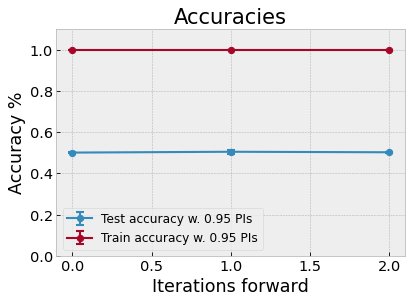

Test accuracies: [0.50075713 0.50470897 0.50226401]
Confusion matrices:


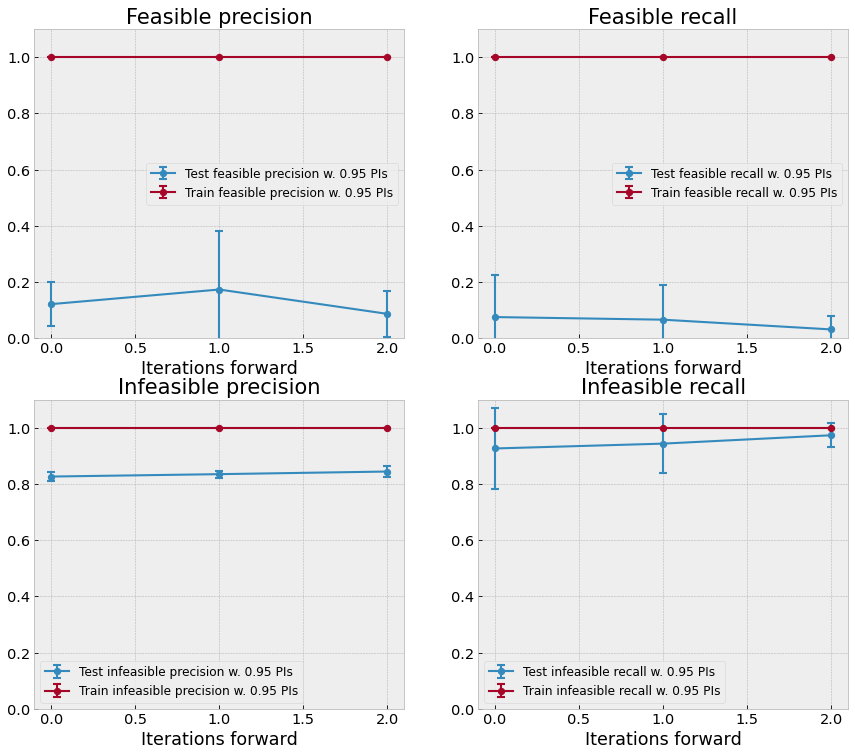

Percentage infeasible on test and train data:


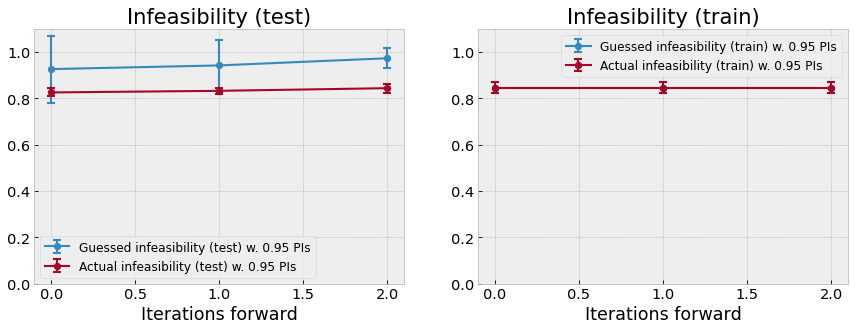

AUC:


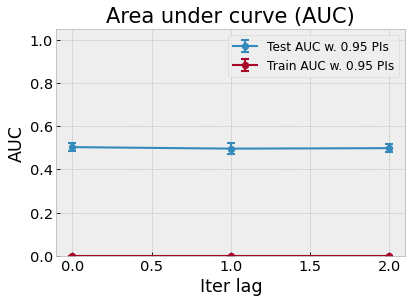

In [27]:
mt.plot_graphs()

## Conclusions 

With 95% confidence, the autoencoder and lightgbm combination **did not achieve a performance** greater then flipping a coin. In addition, the algorithm is relatively slow, thus not meeting the criteria of efficiency.

That being said, one might be able to achieve better performance should the autoencoder be developed further or if one utilises a different classifier in combination with the autoencoder.